In [1]:
# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plotting data with Seaborn and matplotlib

Your ability to understand and communicate data is often entirely dependent on your ability to make a visual representation of that data. The most widely used python libraries for plotting scientific data are `matplotlib` and `seaborn`.

## Key Takeaways:

In today's class we will explore the wide range of python plotting options. We will:

 - Use Relational Plots to compare samples, getting a visual readout of variability
 - Use Histograms and Marginal Plots to look at how data are distributed.
 - Use Categorical Plots to generate focused plots looking at that gene's expression

First, we need to import `pyplot` and `seaborn`. While we're at it, let's import numpy and pandas to store and manipulate data prior to plotting.

In [2]:
# Start with importing the packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats

# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline

Next, we will import the melanoma data files that you generated for your homework using `pd.read_csv()`.

There are 3 key data frames that we'll be working with:

 - `df_log2`: log2-transformed expression values, with different cell line replicates in the columns and genes in rows.
 - `df_group`: a condensed version of `df_log2` with the different biological replicates consolidated. Cell lines are in the columns, and genes are in rows.
 - `dfT`: a transposed version of `df_log2` that has the genes in the columns and the different cell line replicates in the rows. This data frame also has the metadata information in the first 5 columns.

In [3]:
# Now to import some data to work with:
df_log2 = pd.read_csv('df_log2.csv', index_col=0)
dfT = pd.read_csv('df_T.csv', index_col=0)
df_group = pd.read_csv('df_group.csv', index_col=0)

print (df_log2.head(),df_log2.shape)
print (dfT.head(),dfT.shape)
print (df_group.head(),df_group.shape)


                  FM_1       FM_2       FM_3  SK_MEL_28_1  SK_MEL_28_2  \
gene_symbol                                                              
ANKIB1       11.332037  11.247928  11.013323    11.363040    11.660887   
ZNF618       10.540128  10.492855  10.088788     9.961450    10.087463   
IMPG2         3.700440   3.169925   3.906891     2.000000     1.000000   
SLC26A6      10.112440   9.575539  10.558421     9.816984    10.142107   
MAPKAPK3     10.664447  10.799282  10.487840     9.903882     9.995767   

             SK_MEL_28_3  SK_MEL_147_1  SK_MEL_147_2  SK_MEL_147_3  UACC_62_1  \
gene_symbol                                                                     
ANKIB1         11.624795     11.212496     10.897845     11.182394  11.510764   
ZNF618          9.957102     10.927037     10.570804     10.659104  10.130571   
IMPG2           2.584963      4.169925      3.807355      3.700440   4.643856   
SLC26A6         9.936638      9.768184     10.029287      9.824959  10.45635

### Data frame organization:

The plotting libraries we are using are like the those in pandas that we've introduced: expecting each column to be a different variable and each row a different observation.

When comparing __samples or cell lines__ to each other, it makes sense to have the samples as the variable columns and have each gene be an 'observation' of how similar the samples are, gene by gene. For these plots, we'll use `df_log2` and `df_group`, respectively.

When comparing __genes__  to each other, we want to have the genes as the columns and the samples as the rows. For these plots, we'll use `dfT`.

## A brief dabble into `matplotlib`'s `pyplot`:

The plotting functionalities we're going to be talking about from `pyplot` and `seaborn` are all based on functions from the `matplotlib` package. We're going to do the majority of our plotting with `seaborn` since the code is cleaner and the plots are prettier, but it's useful to see how you can plot something with the base case.

Fundamentally, when you ask `pyplot` to create a plot, it's creating 3 layers of objects, illustrated here:

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" alt="Objects of a pyplot figure" title = "Pyplot hierarchy"/>

1. a "figure": a container for 1 or more plots.
1. an "axes": each individual plot within a _figure_.
1. a set of plot components (e.g, x-axis, y-axis, legends, labels, etc) within each _axes_.

`pyplot` treats each element of a plot as a separate object. A figure is the whole figure, and axes is one subplot within that figure. You can create and manipulate each part of the figure.

The image below is a visual glossary to help you see of all the features you can adjust within a `pyplot` figure:

<img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png" alt="Objects of a pyplot figure" title = "Pyplot hierarchy"/>

***

The most explicit way to plot something is to use a function to define the "figure" and "axes" objects, then modify the "axes" by filling it with specific pieces:

Text(0.5, 1.0, 'Scatter plot of FM_1 vs. FM_2')

Text(0.5, 0, 'Sample FM_1')

Text(0, 0.5, 'Sample FM_2')

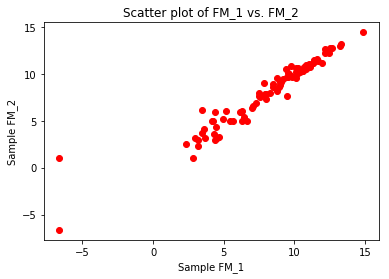

In [4]:
# define the figure and axes objects, assigning to the variables "fig" and "ax," respectively.
fig, ax = plt.subplots() # Note: this is your opportunity to define how many plots you want in a figure, and what is your desired figure size (with arguments added to plt.subplots())
ax.scatter(x = df_log2['FM_1'], y = df_log2['FM_2'], marker = 'o', color = 'r') # This tells that you want a scatter plot 
# plot modifiers
ax.set_title('Scatter plot of FM_1 vs. FM_2')
ax.set_xlabel('Sample FM_1')
ax.set_ylabel('Sample FM_2')
plt.show()

This gets kind of clunky, so pyplot enables a more streamlined way of plotting, which __implicitly__ modifies the most recent "axes" object that's being acted on:

Text(0.5, 1.0, 'Scatter plot of FM_1 vs. FM_2')

Text(0.5, 0, 'Sample FM_1')

Text(0, 0.5, 'Sample FM_2')

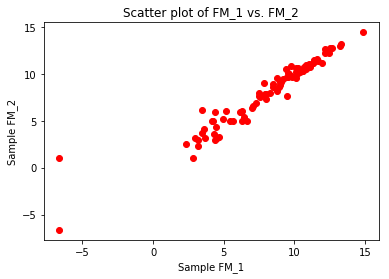

In [5]:
plt.scatter(x = df_log2['FM_1'], y = df_log2['FM_2'], marker = 'o', color = 'r')
plt.title('Scatter plot of FM_1 vs. FM_2')
plt.xlabel('Sample FM_1')
plt.ylabel('Sample FM_2')
plt.show()

The benefit of this approach is that it's easier to read, and easier to type. But, if you've got multiple axes objects within a figure, `pyplot` may end up making the wrong adjustments/plots in the wrong axes/plot area.

For more information about pyplot, the following websites are good resources:

 - https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
 - https://realpython.com/python-matplotlib-guide/

## Seaborn plotting

`seaborn` is the package to use if you want to make some fancier, prettier, more customized plots, so we're going to spend the rest of our time focusing on using this. Note though that you will still be modifying `seaborn` figures with `pyplot` functions. 

### Relational Plots

We mentioned in an earlier class that `pandas` is built on top of `numpy` to provide easier syntax, easier to read code, and more visually appealing tables. Similarly, `seaborn` is a wrapper around `matplotlib` that makes a fairly complex but powerful library more accessible. We will be showing you both at the same time, as we think `seaborn` is easier to learn and use.  

Scatter plots or line plots are useful for showing the __relationship__ between two variables, which we can plot using the `seaborn` function `relplot`. Let's start by comparing two replicate samples, `FM_1` and `FM_2` across all genes in our log2 transformed sampleset.

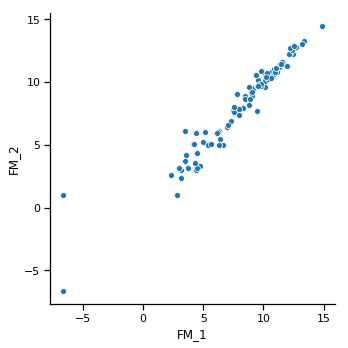

In [6]:
sns.set_context("notebook") # This sets the overall visualization characteristics. Options: "notebook",“paper”, “talk”, and “poster”

g = sns.relplot(x="FM_1", y="FM_2", data=df_log2)
plt.show()

So, right off the bat we are mixing sns and plt. In the first line of code we are calling the `sns` function `relplot`, which defaults to a scatterplot. This website gives more information about what you can do with the `relplot` function: https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

For example, you can also use `relplot` to show lines by changing the "kind" argument (give it a try).

Notice that we assign the plot to a variable, and then use `plt.show` from `matplotlib` to print the plot. This is one of several ways to print plots. You will also often see code blocks that simply end with a plotting function, which has a similar output.

***

Let's do some customizations on this plot. 

When you make a plot using `plt` or `sns`, you can build it element by element. 

To facilitate comparison between these 2 samples and look for genes that have *large* expression changes, we want to indicate what a 2-fold expression change with lines look like.

To do this, let's repeat the plot from above, but add lines using the `plt.plot` that show the cutoff for a two-fold change. Since our data is in log2, we simply need lines one step out from the identity line (y=x).

Note that you can tell seaborn to plot the color of the points according to a specific variable.

(-10, 20)

(-10, 20)

Text(0.5, 25.96, 'Sample FM_1')

Text(0.5, 1.0, 'FM_1 vs. FM_2')

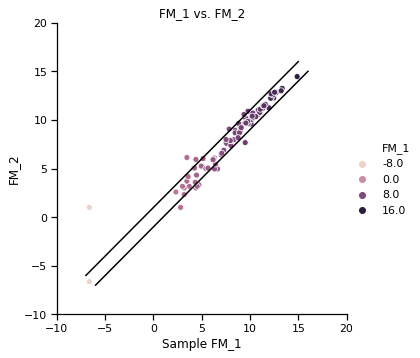

In [11]:
g = sns.relplot(x="FM_1", y="FM_2", data=df_log2,hue = 'FM_1')
plt.plot([-7,15],[-6,16],'k') # adding a line going from  (x,y) = (-7,-6) to (15,16); 'k' changes the color of the line to black
plt.plot([-6,16],[-7,15],'k') # adding a line going from  (x,y) = (-6,-7) to (16,15) 

# other customizations of the plot:
plt.xlim(-10, 20) # adjusting x axis limits
plt.ylim(-10, 20) # adjusting y axis limits
plt.xlabel('Sample FM_1') # renaming x axis title
plt.title('FM_1 vs. FM_2')
plt.show()

Notice that most of the points of this plot lie within the black lines, indicating the most of the genes have expression values that are within two-fold between the two samples. This suggests consistent expression values between replicates, and is a good sanity check that helps to signify that the data are of good quality.



***

Now, let's look at 2 samples belonging to different phenotypes.

### <font color=brown>Hands on practice</font>

Generate a scatter plot of `FM_1` and `UACC_62_1` with black lines demarcating 2-fold change. Do there appear to be more or less genes with large (>2) fold changes?


(-10, 20)

(-10, 20)

Text(0.5, 25.96, 'Sample FM_1')

Text(0.5, 1.0, 'FM_1 vs. FM_2')

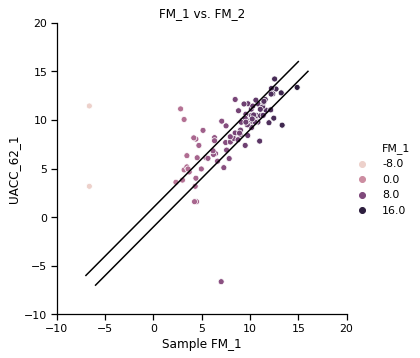

In [12]:
# Generate a scatter plot of FM_1 and UACC_62_1 with black lines demarcating 2-fold change
g = sns.relplot(x="FM_1", y="UACC_62_1", data=df_log2,hue = 'FM_1')
plt.plot([-7,15],[-6,16],'k') # adding a line going from  (x,y) = (-7,-6) to (15,16); 'k' changes the color of the line to black
plt.plot([-6,16],[-7,15],'k') # adding a line going from  (x,y) = (-6,-7) to (16,15) 

# other customizations of the plot:
plt.xlim(-10, 20) # adjusting x axis limits
plt.ylim(-10, 20) # adjusting y axis limits
plt.xlabel('Sample FM_1') # renaming x axis title
plt.title('FM_1 vs. FM_2')
plt.show()

### Plotting Distributions

Another common visualization is the histogram, to view the overall distribution of the data. To do this with `seaborn`, we can use the `distplot` function.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


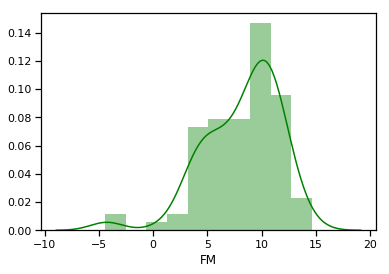

In [13]:
# Histogram
sns.distplot(df_group.loc[:,'FM'],bins=10,color='green')
plt.show()

Note that the default distplot gives you both the histogram (in bars), as well as a fitted density plot, which estimates what the underlying distribution looks like. You can turn each of these visualizations off by adding the arguments `kde=False` or `hist=False` to the `distplot` function.

***

To compare distributions of two variables, you can use the `jointplot` function.

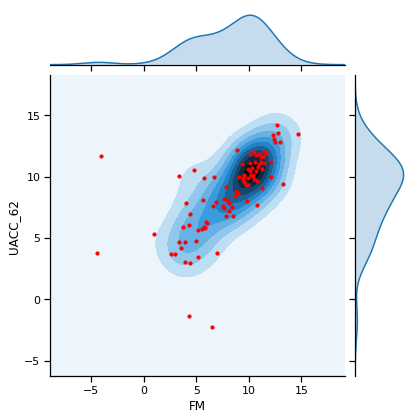

In [14]:
# Marginal Plot
g = sns.jointplot(x="FM",y="UACC_62",data=df_group,kind="kde") # kind options: scatter, reg,resid,kde,hex
g.plot_joint(plt.scatter, c="red",s=10) # c = color; s = size ## Note that we can overlay 
plt.show()

### Categorical Plots
 
 
For this section, we'll be generating some plots comparing the expression of genes between different phenotypes. Given this, we'll be working with the data frame `dfT`.

In [15]:
dfT.iloc[:,0:7]

,Sample_geo_accession,Stage,cell type,CellLine,ANKIB1,ZNF618,IMPG2
Sample Title,,,,,,,
FM_1,GSM2344965,primary melanocytes,normal melanocytes,FM,11.332037,10.540128,3.700440
FM_2,GSM2344966,primary melanocytes,normal melanocytes,FM,11.247928,10.492855,3.169925
FM_3,GSM2344967,primary melanocytes,normal melanocytes,FM,11.013323,10.088788,3.906891
SK_MEL_28_1,GSM2344968,metastatic,melanoma cell line,SK_MEL_28,11.363040,9.961450,2.000000
SK_MEL_28_2,GSM2344969,metastatic,melanoma cell line,SK_MEL_28,11.660887,10.087463,1.000000
SK_MEL_28_3,GSM2344970,metastatic,melanoma cell line,SK_MEL_28,11.624795,9.957102,2.584963
SK_MEL_147_1,GSM2344971,metastatic,melanoma cell line,SK_MEL_147,11.212496,10.927037,4.169925
SK_MEL_147_2,GSM2344972,metastatic,melanoma cell line,SK_MEL_147,10.897845,10.570804,3.807355
SK_MEL_147_3,GSM2344973,metastatic,melanoma cell line,SK_MEL_147,11.182394,10.659104,3.700440


We want to find some genes of interest to focus on in our plots. We start by creating separate data frames for the Normal and the Metastatic samples.

Note that the metadata tells us that the first 3 samples are normal, and the rest are metastatic.

We'll also extract the gene names that we're looking at.

In [16]:
#slicing out the normal and metastatic samples
normal = dfT.iloc[0:3,4:]
metastatic = dfT.iloc[3:,4:]

print(normal.head())
print(metastatic.head())

# pulling out gene names
genenames = normal.columns
genenames

                 ANKIB1     ZNF618     IMPG2    SLC26A6   MAPKAPK3    DYNLT3  \
Sample Title                                                                   
FM_1          11.332037  10.540128  3.700440  10.112440  10.664447  8.459432   
FM_2          11.247928  10.492855  3.169925   9.575539  10.799282  8.915879   
FM_3          11.013323  10.088788  3.906891  10.558421  10.487840  9.152285   

                GRAMD3       MPDZ      DGKI       RCC2    ...      \
Sample Title                                              ...       
FM_1          8.455327  12.458663  5.129283  12.693051    ...       
FM_2          8.668885  12.259155  6.022368  12.809768    ...       
FM_3          8.797662  11.452756  5.930737  12.758640    ...       

              RP11-872D17.8     CC2D1A  RP11-146B14.1     GPR83    SCAMP5  \
Sample Title                                                                
FM_1               3.584963  10.602699       6.209453  4.321928  7.066089   
FM_2               4.1

Index(['ANKIB1', 'ZNF618', 'IMPG2', 'SLC26A6', 'MAPKAPK3', 'DYNLT3', 'GRAMD3',
       'MPDZ', 'DGKI', 'RCC2', 'KIF5A', 'GTF2H1', 'TMEM126B', 'COL1A1',
       'SLC35A3', 'TMEM60', 'ELFN1', 'MARCKSL1', 'TRAPPC2B', 'NCMAP', 'BMPR1A',
       'WDR19', 'TAF1D', 'BCAP31', 'RPS6KA6', 'PGBD2', 'TSNAXIP1', 'CHRNA7',
       'DYNC2H1', 'MTSS1', 'ZCCHC17', 'IFT74', 'FOXC1', 'CDIP1', 'SULT1A1',
       'SHMT1', 'ZNF343', 'RECQL4', 'DTX3L', 'CPAMD8', 'NBAS', 'ZNF24',
       'MOB3A', 'EHF', 'LUM', 'PLEKHM3', 'IQCG', 'TCEAL9', 'CSRNP3', 'TSSK6',
       'ACAT1', 'PTPN9', 'NUTM2A', 'OAZ3', 'ETF1', 'AXIN2', 'UQCR11', 'FKBPL',
       'TRMT1L', 'C1QTNF9B-AS1', 'NHEJ1', 'RPRD1A', 'KPNA4', 'MAGEA12',
       'RPL13AP6', 'GID4', 'LMNB1', 'RPL23AP97', 'CTD-3214H19.4', 'MSTO2P',
       'MANF', 'SLC18B1', 'SSH1', 'COQ3', 'FAM111B', 'HNRNPD', 'NOMO1',
       'GPR75-ASB3', 'GTF2E1', 'SLC25A21', 'MRO', 'RP11-163E9.2', 'POLI',
       'RP11-872D17.8', 'CC2D1A', 'RP11-146B14.1', 'GPR83', 'SCAMP5', 'FRS2',
       'ABCC11'

We'll then calculate the t-test p-values for each gene between these two groups (like we did in class 6), and identify the most statistically significant differences.

In [17]:
# Then t test
stat, p = stats.ttest_ind(normal, metastatic)
print(p)

[2.21947143e-01 6.59127346e-01 6.93357957e-01 9.12349018e-01
 8.30322419e-01 2.44405579e-03 6.83876063e-02 4.51052642e-03
 6.21257004e-02 1.34901834e-02 2.28818450e-01 5.96516466e-01
 3.68206969e-01 9.80690092e-01 8.85205826e-01 9.65765704e-01
 2.53923299e-02 2.56274417e-04 5.37115787e-01 1.03216252e-01
 2.83610065e-01 2.13584826e-03 4.56573648e-02 1.51868165e-02
 1.96198779e-01 4.32713976e-01 1.00358145e-01 1.54085363e-03
 2.58643097e-02 9.15281365e-04 2.39951137e-01 2.06620780e-02
 4.64592692e-06 5.64705695e-02 3.16276053e-01 1.50599890e-01
 1.29334332e-01 1.34209233e-04 2.81404477e-02 3.42649166e-02
 9.79521405e-01 2.38203602e-03 4.34414053e-04 5.14516193e-04
 2.77037838e-03 6.70914825e-01 3.63484918e-01 2.51901266e-01
 4.43773105e-02 1.29413948e-02 1.38364972e-01 1.66904250e-01
 2.22711598e-01 9.56453608e-01 3.96522909e-04 6.10066245e-02
 3.41217649e-01 5.88663235e-01 7.77160260e-01 5.57821410e-01
 4.12147518e-01 3.70993351e-01 6.44274696e-04 3.68456627e-07
 3.25127787e-01 1.437786

Now that we have the p values, we want to sort the genes based on p value. To do this, we want to get the indices that would sort the p value array, and use that information to get the ordered gene names.

In [18]:
# extracting the indexes that would give a sorted p
pidx = np.argsort(p)

# mapping these indexes to gene names
orderedgenes = genenames[pidx]

print(orderedgenes)

Index(['MAGEA12', 'FOXC1', 'RECQL4', 'MARCKSL1', 'LMNB1', 'SLC18B1', 'ETF1',
       'MOB3A', 'EHF', 'KPNA4', 'SCAMP5', 'MTSS1', 'GID4', 'CHRNA7', 'WDR19',
       'ZNF24', 'DYNLT3', 'GTF2E1', 'LUM', 'POLI', 'MSTO2P', 'MPDZ', 'TSSK6',
       'RCC2', 'BCAP31', 'IFT74', 'ELFN1', 'DYNC2H1', 'DTX3L', 'COQ3', 'MANF',
       'CPAMD8', 'HNRNPD', 'GPR83', 'CSRNP3', 'TAF1D', 'CDIP1', 'AXIN2',
       'DGKI', 'CC2D1A', 'GRAMD3', 'RPL23AP97', 'TSNAXIP1', 'NCMAP', 'ZNF343',
       'ACAT1', 'FRS2', 'RP11-163E9.2', 'SHMT1', 'PTPN9', 'RPS6KA6', 'ANKIB1',
       'NUTM2A', 'NOMO1', 'KIF5A', 'ZCCHC17', 'TCEAL9', 'CTD-3214H19.4', 'MRO',
       'BMS1P7', 'BMPR1A', 'SULT1A1', 'RPL13AP6', 'UQCR11', 'IQCG', 'TMEM126B',
       'RPRD1A', 'SLC25A21', 'GPR75-ASB3', 'NHEJ1', 'SSH1', 'PGBD2', 'CHRNB1',
       'FAM111B', 'TRAPPC2B', 'C1QTNF9B-AS1', 'CCDC90B', 'FKBPL', 'GTF2H1',
       'RP11-146B14.1', 'ZNF618', 'PLEKHM3', 'IMPG2', 'ABCC11', 'TRMT1L',
       'MAPKAPK3', 'RP11-872D17.8', 'SLC35A3', 'SLC26A6', 'OAZ3', 'T

In [19]:
print(normal.loc[:,('MAGEA12', 'FOXC1', 'RECQL4')])
print(metastatic.loc[:,('MAGEA12', 'FOXC1', 'RECQL4')])

               MAGEA12     FOXC1    RECQL4
Sample Title                              
FM_1         -6.643856  3.169925  8.804131
FM_2          1.000000  2.321928  9.638436
FM_3         -6.643856  4.584963  9.721099
                MAGEA12      FOXC1     RECQL4
Sample Title                                 
SK_MEL_28_1   11.020980   7.845490  11.156715
SK_MEL_28_2   11.171177   8.262095  11.384244
SK_MEL_28_3   11.147205   8.348728  11.291746
SK_MEL_147_1  12.176796  10.200899  10.726218
SK_MEL_147_2  12.143064  10.159871  10.770664
SK_MEL_147_3  11.811776  10.258566  10.236014
UACC_62_1     11.435149  10.044394  10.942515
UACC_62_2     11.892543  10.112440  11.284824
UACC_62_3     11.632995  10.029287  10.913637


There are many ways to plot categorical data like `bar`, `box`, and `swarm` plots. Let's look at the expression of `MAGEA12` using each of these methods. There are separate methods for each, but they are pulled together for convenience in one function, `catplot`.

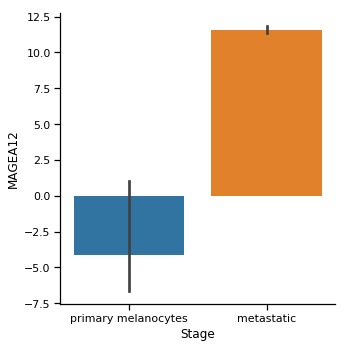

In [20]:
# Starting off with a bar plot
g = sns.catplot(x = 'Stage',y='MAGEA12', data=dfT, kind="bar")
plt.show()
# Note that the error bars are plotted by default

### <font color=brown>Hands on practice</font>

Generate a bar plot of each cell line's expression of the gene `FOXC1`.

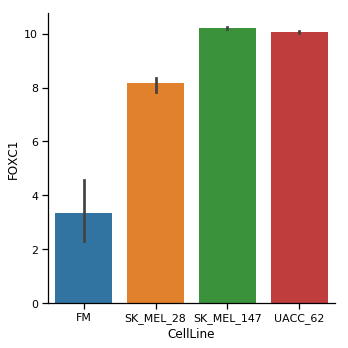

In [24]:
#bar plot of FOXC1 expression for each cell line
g = sns.catplot(x = 'CellLine',y='FOXC1', data=dfT, kind="bar")
plt.show()

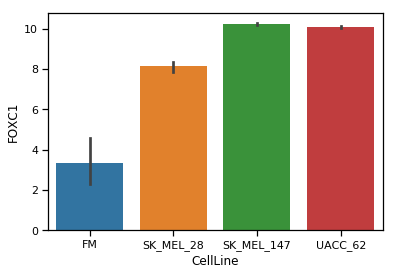

In [23]:
#bar plot of FOXC1 expression for each cell line
g = sns.barplot(x = 'CellLine',y='FOXC1', data=dfT)
plt.show()

***

Comparing distributions is often done with boxplots or swarm plots:

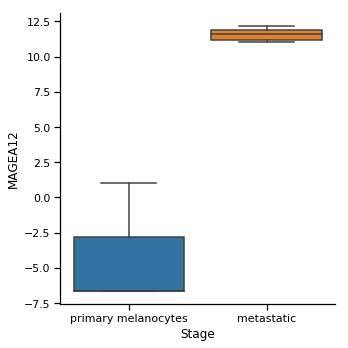

In [25]:
g = sns.catplot(x = 'Stage',y='MAGEA12', data=dfT, kind="box")
plt.show()

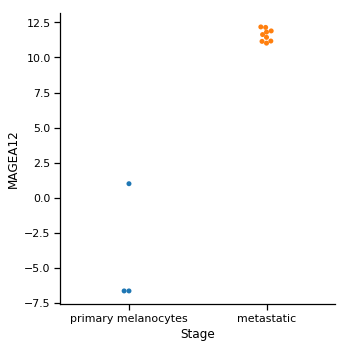

In [26]:
g = sns.catplot(x = 'Stage',y = 'MAGEA12', data=dfT, kind="swarm")
plt.show()

Note that you can tell seaborn to plot the color of the swarm points according to a specific variable.

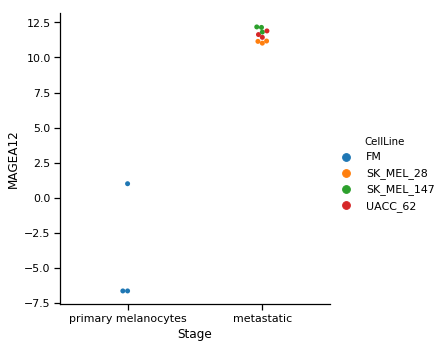

In [27]:
g = sns.catplot(x = 'Stage',y = 'MAGEA12',hue = 'CellLine', data=dfT, kind="swarm")
plt.show()

Note that you can overlay plots on top of each other.

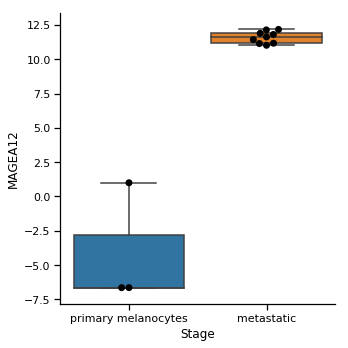

In [28]:
# an overlayed box and swarm plot
g = sns.catplot(x="Stage", y="MAGEA12", kind="box", data=dfT)
sns.swarmplot(x="Stage", y="MAGEA12", color="k", size=7, data=dfT, ax=g.ax)

### <font color=brown>Hands on practice</font>

Generate a box and swarm plot of each cell line's expression of the gene `FOXC1`.

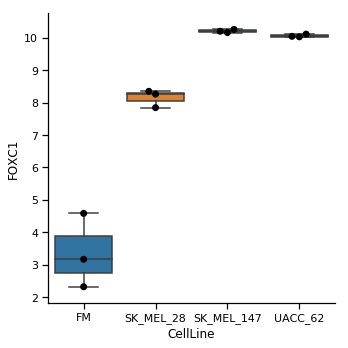

In [29]:
#an overlayed box and swarm plot of FOXC1 expression for each cell line
# an overlayed box and swarm plot
g = sns.catplot(x="CellLine", y="FOXC1", kind="box", data=dfT)
sns.swarmplot(x="CellLine", y="FOXC1", color="k", size=7, data=dfT, ax=g.ax)

## Bonus: Customizing color palettes

`pyplot` and `seaborn` give you a lot of ways to customize the color scheme of your plots.

Option 1: you can pick a specific color by name (see https://python-graph-gallery.com/196-select-one-color-with-matplotlib/ for list of colors).

Option 2: you can select a color palette scheme. Useful resources for color palettes:
 - https://seaborn.pydata.org/tutorial/color_palettes.html
 - https://matplotlib.org/users/colormaps.html

In [30]:
# Getting the current palette
current_palette = sns.color_palette()

In [31]:
# Setting up
cbpalseq = sns.choose_colorbrewer_palette(data_type='qualitative') # possible data types: ‘sequential’, ‘diverging’, ‘qualitative’


interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

You can temporarily set the color palette for one plot by using the `palette` argument within a plotting function:

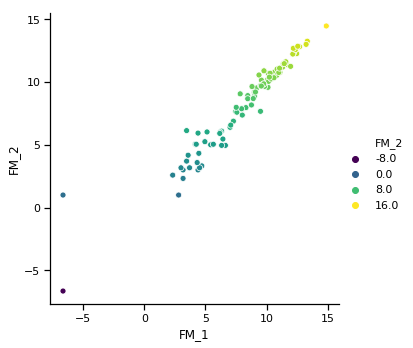

In [32]:
g = sns.relplot(x="FM_1", y="FM_2", data=df_log2,hue = 'FM_2',palette='viridis')

Alternatively, you can reset the default `seaborn` color palette:

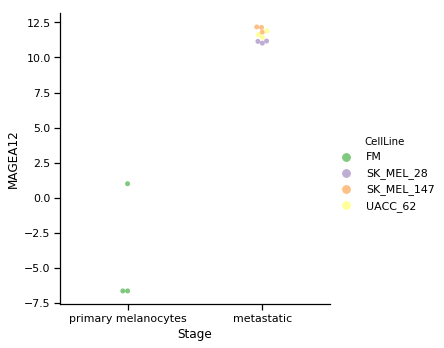

In [33]:
# Setting a color palette
sns.set_palette(sns.color_palette(cbpalseq))

# Now try plotting
g = sns.catplot(x = 'Stage',y = 'MAGEA12',hue = 'CellLine', data=dfT, kind="swarm")